<a href="https://colab.research.google.com/github/josmuniz/COMP313_AI/blob/main/COMP313_PROJECT_PREDICT_V5_Consume_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import joblib


In [ ]:
# Load the dataset
df_cleaned = pd.read_csv('/content/drug_consumption_cleaned.csv')

In [ ]:
df_cleaned.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,2,1,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2,1,0,8,5,6,-0.67825,1.93886,1.43533,0.76096,...,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,3,2,0,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0,1,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5,2,1,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


In [ ]:
# Reviewing of CORRELATION Matrix this Column has low correlation with strong drugs.

low_corr = ['ID','Age', 'Gender', 'Education','Country','Ethnicity']
for column in low_corr:
    df_cleaned = df_cleaned.drop(column, axis=1)
df_cleaned.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,2.0,2.0,...,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nscore     1877 non-null   float64
 1   Escore     1877 non-null   float64
 2   Oscore     1877 non-null   float64
 3   Ascore     1877 non-null   float64
 4   Cscore     1877 non-null   float64
 5   Impulsive  1877 non-null   float64
 6   SS         1877 non-null   float64
 7   Alcohol    1877 non-null   float64
 8   Amphet     1877 non-null   float64
 9   Amyl       1877 non-null   float64
 10  Benzos     1877 non-null   float64
 11  Cannabis   1877 non-null   float64
 12  Coke       1877 non-null   float64
 13  Crack      1877 non-null   float64
 14  Ecstasy    1877 non-null   float64
 15  Heroin     1877 non-null   float64
 16  Ketamine   1877 non-null   float64
 17  Legalh     1877 non-null   float64
 18  LSD        1877 non-null   float64
 19  Meth       1877 non-null   float64
 20  Mushroom

In [ ]:
# List of addictive drugs
addictive_drugs = [
    'Alcohol', 'Amphet','Amyl','Benzos','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Ketamine','VSA'
]


# Define a new target variable 'AnyAddictiveDrug' based on the new criteria
df_cleaned['AnyAddictiveDrug'] = df_cleaned[addictive_drugs].apply(lambda x: ((x == 5) | (x == 6)).any(), axis=1).astype(int)
df_cleaned.shape

(1877, 24)

In [ ]:
df_cleaned.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,AnyAddictiveDrug
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,2.0,2.0,...,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0


In [ ]:
#Save DataFrame to CSV file
output_file = '/content/drug_consumption_cleaned__tmp.csv'
df_cleaned.to_csv(output_file, index=False)  #


In [ ]:
# Define the feature matrix and target vector

X = df_cleaned.drop('AnyAddictiveDrug',axis=1)  # Drop the individual drug columns
y = df_cleaned['AnyAddictiveDrug']

# Split the data into training and testing sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, 'scaler_drug_use.pkl')

['scaler_drug_use.pkl']

In [ ]:
X.shape, X_train.shape, X_test.shape
X_train_scaled.shape
X_test_scaled.shape

(376, 23)

In [ ]:
X.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,2.0,2.0,...,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


In [ ]:
X_test_scaled[0]

array([ 0.14079034, -2.34721182,  0.31135877, -1.06678701, -0.89771959,
       -0.73638976, -0.51864484,  1.02088679,  0.3863201 , -0.57188954,
        0.82520798,  0.01726002,  1.21350344, -0.35369501,  2.27292091,
        1.6108062 ,  3.81804293,  1.48298344,  0.65997362,  2.53332673,
        1.25682126,  0.33678835, -0.44178493])

LR Accuracy: 92.29%


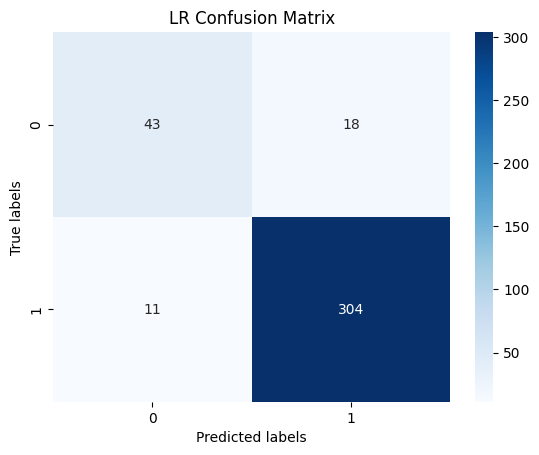

RF Accuracy: 97.87%


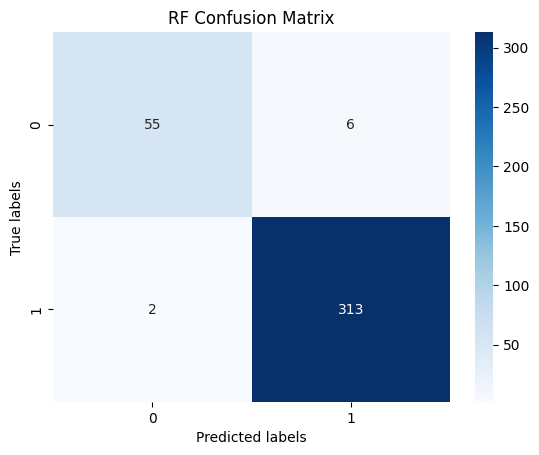

12/12 [==============================] - 0s 2ms/step
ANN Model Accuracy: 97.34%


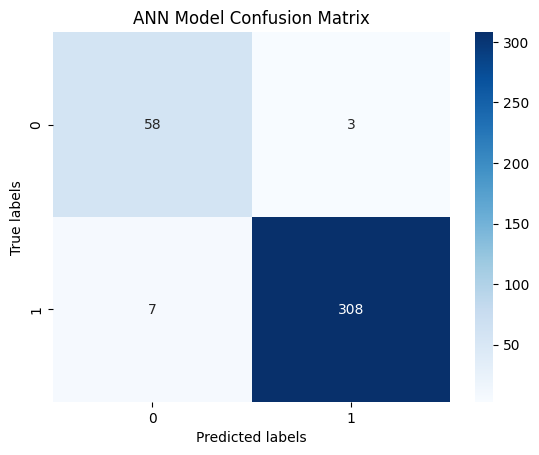

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Define the machine learning models
models = {
    'LR': LogisticRegression(max_iter=5000),
    'RF': RandomForestClassifier()
}

# Function to train and evaluate the machine learning models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy: {accuracy:.2%}')
        plot_confusion_matrix(y_test, y_pred, title=f'{name} Confusion Matrix')
        joblib.dump(model, f'{name.replace(" ", "_")}_model_drug_use.pkl')

# Function to create the ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.1))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Call the function to train and evaluate ML models
train_and_evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Train and evaluate the ANN model
ann_model = create_ann_model(X_train_scaled.shape[1])
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the ANN model
y_pred_ann = ann_model.predict(X_test_scaled).ravel()
y_pred_ann = [1 if pred > 0.5 else 0 for pred in y_pred_ann]
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f'ANN Model Accuracy: {ann_accuracy:.2%}')

# Plot confusion matrix for the ANN model
plot_confusion_matrix(y_test, y_pred_ann, title='ANN Model Confusion Matrix')
# Save the ANN model
ann_model.save('ANN_model_drug_use.h5')


TEST

In [ ]:
from keras.models import load_model
# Load the trained model and the scaler
model1 = joblib.load('LR_model_drug_use.pkl')
model2 = joblib.load('LR_model_drug_use.pkl')
model3 = load_model('ANN_model_drug_use.h5')

scaler = joblib.load('scaler_drug_use.pkl')

# Define a function for manual testing
def manual_test_drug_consumption(model, scaler, features):

    # Print original features before scaling
    print("Original features:", features)

    #
    features = np.array(features).reshape(1,-1)

    # Scale the features using the loaded scaler
    features_scaled = scaler.transform(features)
    print ("feature after scaled: ", features_scaled)

    # Make a prediction
    prediction = model.predict(features_scaled)
    print ("value is: ", prediction)

    # Interpret the prediction result
    if prediction > 0.01:
        return "The model predicts addictive drug use."
    else:
        return "The model predicts no addictive drug use."

# Define a function for manual testing
def manual_test_drug_consumption1(model, features):

    # Print original features before scaling
    print("Original features:", features)

    #
    #features = np.array(features).reshape(1,-1)

    # Scale the features using the loaded scaler
    #features_scaled = scaler.transform(features)
    #print ("feature after scaled: ", features_scaled)

    # Make a prediction
    prediction = model.predict(features)
    print ("value is: ", prediction)

    # Interpret the prediction result
    if prediction > 0.01:
        return "The model predicts addictive drug use."
    else:
        return "The model predicts not addictive drug use."

# Example features for manual testing
# Replace these values with the actual values for the features you're testing
example_features = np.array([[0.31287,-0.57545, -0.58331, -0.91699, -0.00665,-0.21712,-1.18084, 3,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0]])
# Call the function with the example features

result = manual_test_drug_consumption(model1, scaler, example_features)
print(result)

result = manual_test_drug_consumption(model2, scaler, example_features)
print(result)

result = manual_test_drug_consumption1(model3,example_features)
print(result)

Original features: [[ 0.31287 -0.57545 -0.58331 -0.91699 -0.00665 -0.21712 -1.18084  3.
   0.       0.       0.       3.       0.       0.       0.       0.
   0.       0.       3.       0.       0.       0.       0.     ]]
feature after scaled:  [[ 0.31582055 -0.57533042 -0.57755569 -0.90839905 -0.00530129 -0.22327696
  -1.19548121 -1.25826701 -0.74292327 -0.57188954 -0.78063106  0.01726002
  -0.75991873 -0.35369501 -0.78795679 -0.3557006  -0.44981709 -0.74186228
   1.34268927 -0.50820536 -0.80416422 -1.32337361 -0.44178493]]
value is:  [0]
The model predicts no addictive drug use.
Original features: [[ 0.31287 -0.57545 -0.58331 -0.91699 -0.00665 -0.21712 -1.18084  3.
   0.       0.       0.       3.       0.       0.       0.       0.
   0.       0.       3.       0.       0.       0.       0.     ]]
feature after scaled:  [[ 0.31582055 -0.57533042 -0.57755569 -0.90839905 -0.00530129 -0.22327696
  -1.19548121 -1.25826701 -0.74292327 -0.57188954 -0.78063106  0.01726002
  -0.75991873 -

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
value is:  [[1.]]
The model predicts addictive drug use.
